In [1]:
#LOAN PREDICTION

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv("./dataset/train_u6lujuX_CVtuZ9i.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
columns=train.columns.values
print("THE COLUMNS IN DATASET ARE:",columns)

THE COLUMNS IN DATASET ARE: ['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


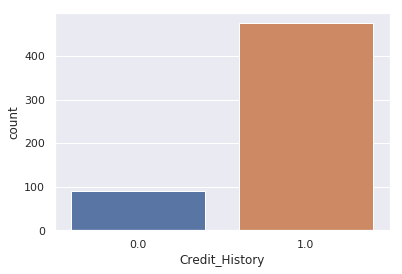

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Credit_History", data=train)

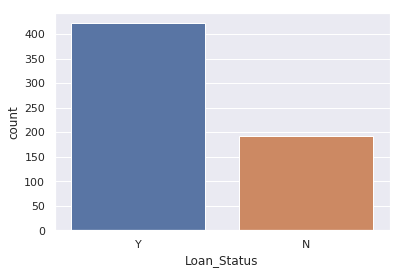

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Loan_Status", data=train)

In [10]:
#~65% (out of 614)got the loan

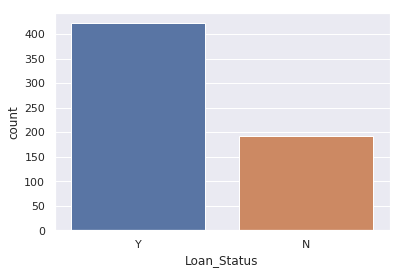

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Loan_Status", data=train)

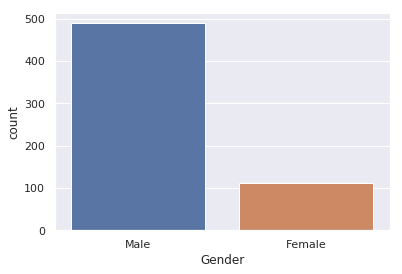

In [12]:
ax=sns.countplot(x="Gender",data=train)

In [13]:
female_p=train['Loan_Status'][train['Gender']=='Female'].value_counts(normalize=True)[0]*100
print("Percentage of females:",train['Loan_Status'][train['Gender']=='Female'].value_counts(normalize=True)[0]*100)

Percentage of females: 66.96428571428571


In [14]:
male_p=train['Loan_Status'][train['Gender']=='Male'].value_counts(normalize=True)[0]*100
print("Percentage of males:",train['Loan_Status'][train['Gender']=='Male'].value_counts(normalize=True)[0]*100)

Percentage of males: 69.32515337423312


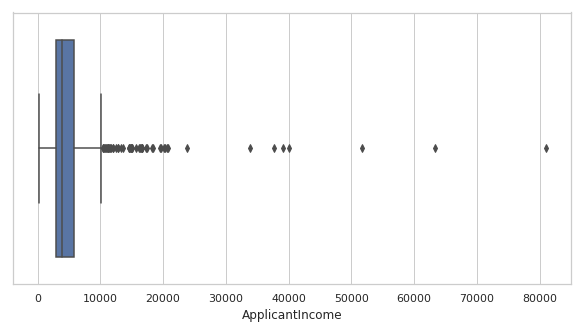

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.ApplicantIncome)

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

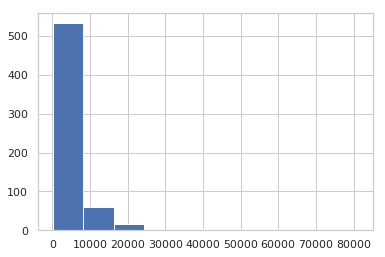

In [16]:
plt.hist(train["ApplicantIncome"])

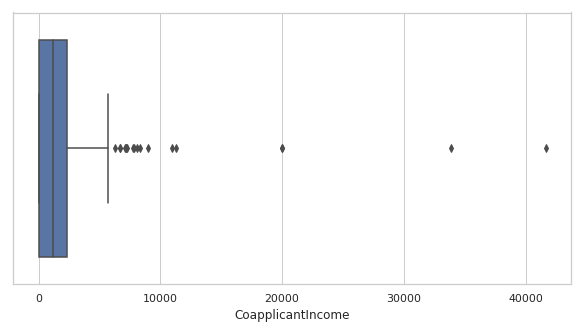

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.CoapplicantIncome)

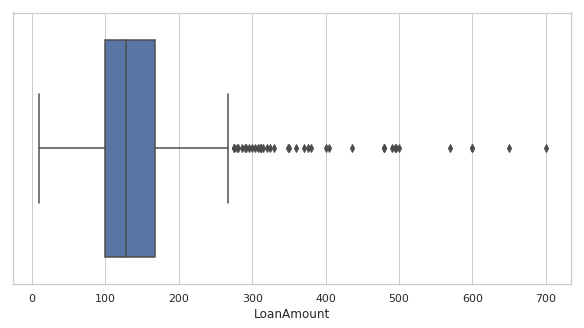

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.LoanAmount)

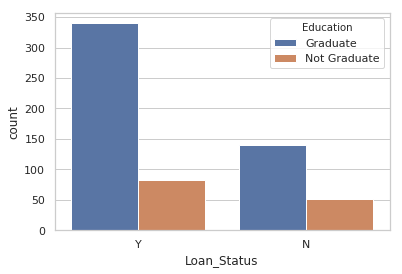

In [19]:
ax = sns.countplot(x="Loan_Status", hue="Education" ,data=train)

In [20]:
print("Percentage of Graduates who got loan:",train['Loan_Status'][train['Education']=='Graduate'].value_counts(normalize=True)[0]*100)
print("Percentage of Non Graduates who got the loan:",train['Loan_Status'][train['Education']=='Not Graduate'].value_counts(normalize=True)[0]*100)

Percentage of Graduates who got loan: 70.83333333333334
Percentage of Non Graduates who got the loan: 61.19402985074627


In [21]:
train.Gender.value_counts()[0]

489

In [22]:
train.Gender.value_counts()[1]

112

In [23]:
print("Percentage of loan approval:",train['Loan_Status'].value_counts(normalize=True)[0]*100)

Percentage of loan approval: 68.72964169381108


In [24]:
print("Percentage of MARRIED who got loan:",train['Loan_Status'][train['Married']=='Yes'].value_counts(normalize=True)[0]*100)
print("Percentage of UNMARRIED who got loan:",train['Loan_Status'][train['Married']=='No'].value_counts(normalize=True)[0]*100)

Percentage of MARRIED who got loan: 71.60804020100502
Percentage of UNMARRIED who got loan: 62.91079812206573


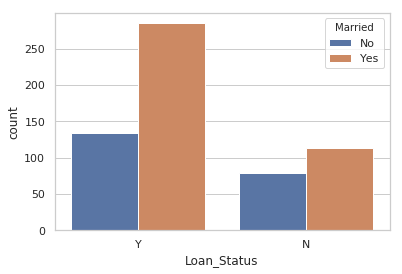

In [25]:
ax = sns.countplot(x="Loan_Status", hue="Married" ,data=train)

In [26]:
((71.61-62.91)/62.91)*100

13.829279923700529

In [27]:
#Married person have more chances to get a laan

In [28]:
print("Percentage of self_employed person who got the loan:",train['Loan_Status'][train['Self_Employed']=='Yes'].value_counts(normalize=True)[0]*100)

Percentage of self_employed person who got the loan: 68.29268292682927


In [29]:
print("Percentage of non self_employed person who got the loan:",train['Loan_Status'][train['Self_Employed']=='No'].value_counts(normalize=True)[0]*100)

Percentage of non self_employed person who got the loan: 68.60000000000001


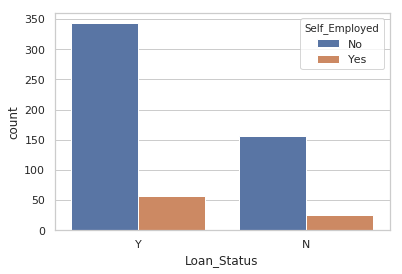

In [30]:
ax = sns.countplot(x="Loan_Status", hue="Self_Employed" ,data=train)

In [31]:

print("Percentage of person residing in Urban area who got the loan:",train['Loan_Status'][train['Property_Area']=='Urban'].value_counts(normalize=True)[0]*100)
print("Percentage of person residing in Rural area who got the loan:",train['Loan_Status'][train['Property_Area']=='Rural'].value_counts(normalize=True)[0]*100)
print("Percentage of person residing in Semiurban area who got the loan:",train['Loan_Status'][train['Property_Area']=='Semiurban'].value_counts(normalize=True)[0]*100)

Percentage of person residing in Urban area who got the loan: 65.84158415841584
Percentage of person residing in Rural area who got the loan: 61.452513966480446
Percentage of person residing in Semiurban area who got the loan: 76.82403433476395


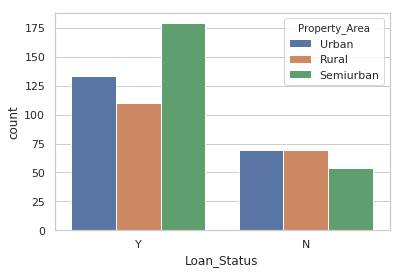

In [32]:
ax = sns.countplot(x="Loan_Status", hue="Property_Area" ,data=train)

In [33]:
#chance to get a loan 
#semi urban>urban>rural

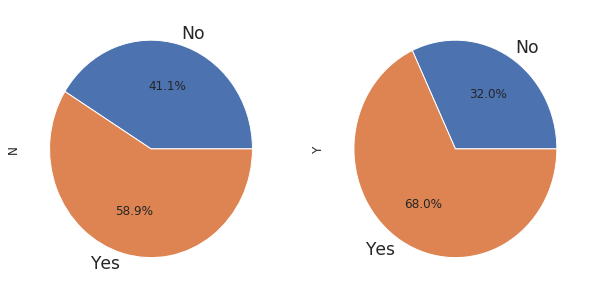

In [34]:
df = train.groupby(['Married','Loan_Status'])['Loan_Status'].count().unstack(level=0)
f,a = plt.subplots(1,2, figsize=(10,5))

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#plt.rcParams['font.size'] = 20.0
df.xs('N').plot(kind="pie",autopct='%1.1f%%', ax=a[0])
df.xs('Y').plot(kind='pie',autopct='%1.1f%%', ax=a[1])


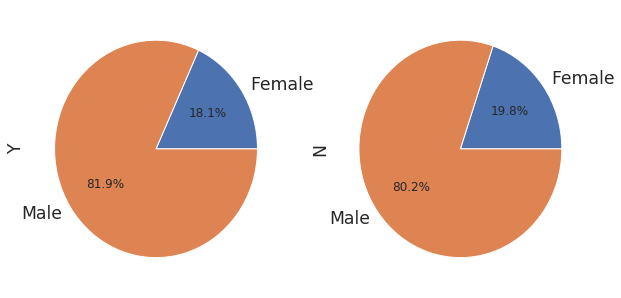

In [35]:
df = train.groupby(['Gender','Loan_Status'])['Loan_Status'].count().unstack(level=0)
f,a = plt.subplots(1,2, figsize=(10,5))

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#plt.rcParams['font.size'] = 20.0
df.xs('Y').plot(kind="pie",autopct='%1.1f%%', ax=a[0])
df.xs('N').plot(kind='pie',autopct='%1.1f%%', ax=a[1])


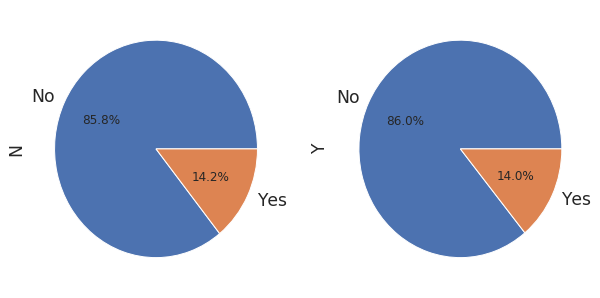

In [36]:
df = train.groupby(['Self_Employed','Loan_Status'])['Loan_Status'].count().unstack(level=0)
f,a = plt.subplots(1,2, figsize=(10,5))

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#plt.rcParams['font.size'] = 20.0
df.xs('N').plot(kind="pie",autopct='%1.1f%%', ax=a[0])
df.xs('Y').plot(kind='pie',autopct='%1.1f%%', ax=a[1])


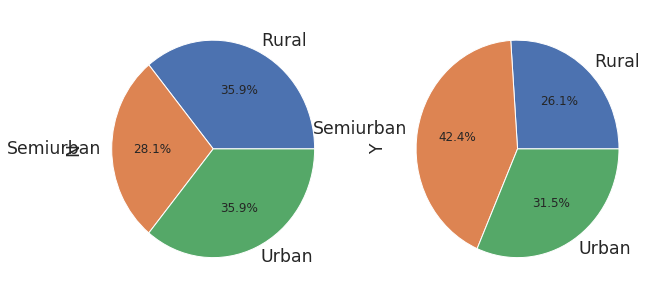

In [37]:
df = train.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count().unstack(level=0)
f,a = plt.subplots(1,2, figsize=(10,5))

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#plt.rcParams['font.size'] = 20.0
df.xs('N').plot(kind="pie",autopct='%1.1f%%', ax=a[0])
df.xs('Y').plot(kind='pie',autopct='%1.1f%%', ax=a[1])


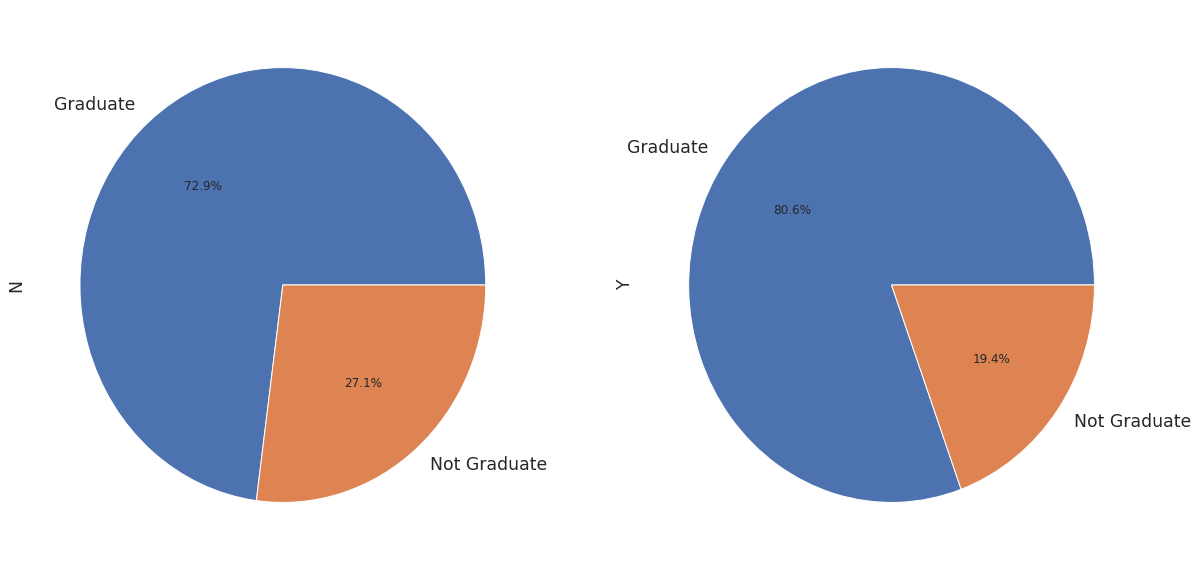

In [38]:
df = train.groupby(['Education','Loan_Status'])['Loan_Status'].count().unstack(level=0)
f,a = plt.subplots(1,2, figsize=(20,10))

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#plt.rcParams['font.size'] = 20.0
df.xs('N').plot(kind="pie",autopct='%1.1f%%', ax=a[0])
df.xs('Y').plot(kind='pie',autopct='%1.1f%%', ax=a[1])


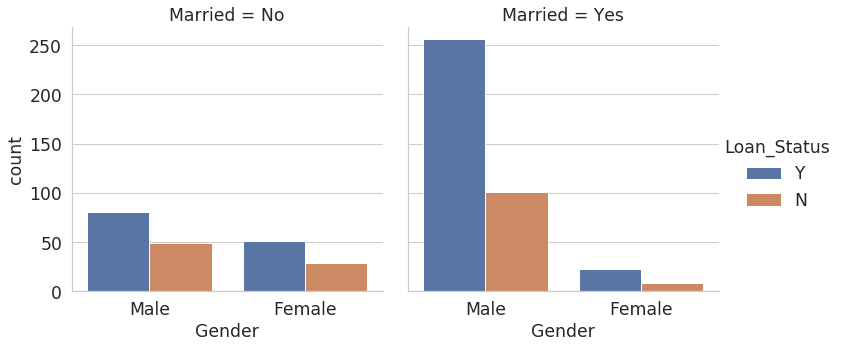

In [39]:
sns.catplot(x="Gender",hue="Loan_Status",col="Married", data=train, kind="count")

In [40]:
train.groupby(['Gender','Married','Loan_Status'])['Loan_Status'].count()

Gender  Married  Loan_Status
Female  No       N               29
                 Y               51
        Yes      N                8
                 Y               23
Male    No       N               49
                 Y               81
        Yes      N              101
                 Y              256
Name: Loan_Status, dtype: int64

/home/d2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


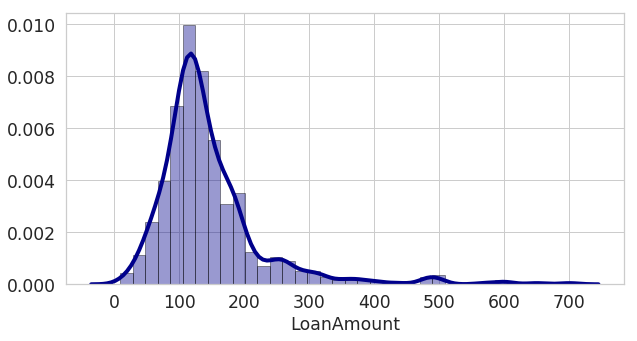

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(train.LoanAmount[train.LoanAmount>=0], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

/home/d2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


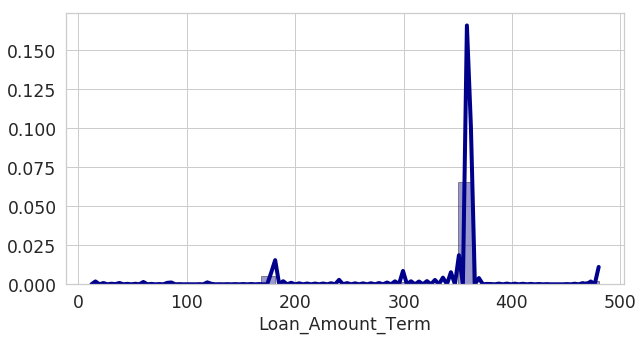

In [42]:
plt.figure(figsize=(10,5))
sns.distplot(train.Loan_Amount_Term[train.Loan_Amount_Term>=0], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

/home/d2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


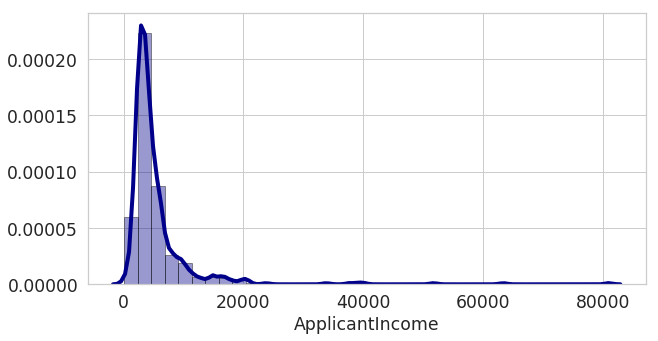

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(train.ApplicantIncome[train.ApplicantIncome>=0], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

/home/d2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


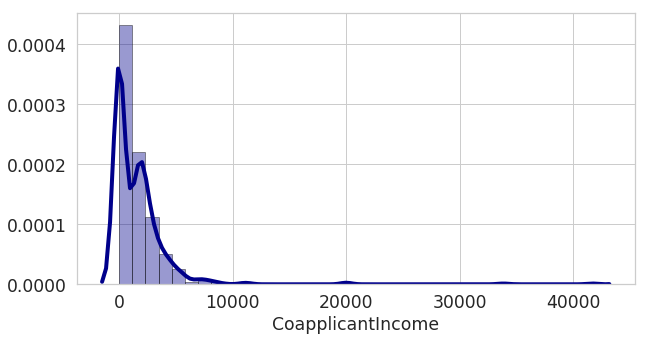

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(train.CoapplicantIncome[train.CoapplicantIncome>=0], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

/home/d2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


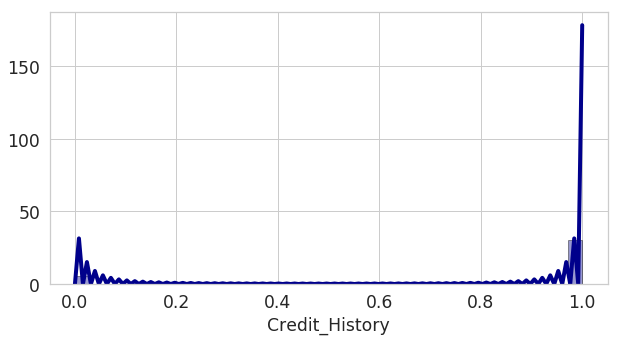

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(train.Credit_History[train.Credit_History>=0], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

In [46]:
corr=train.corr()
print(corr)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


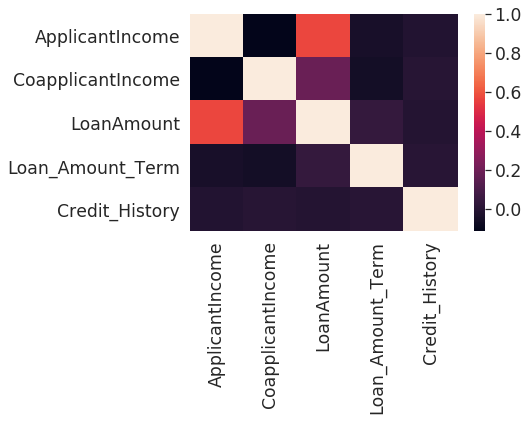

In [47]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


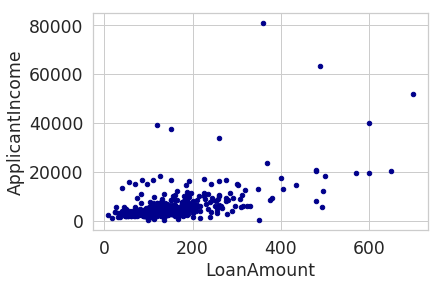

In [48]:
ax1 = train.plot.scatter(x='LoanAmount',y='ApplicantIncome',c='DarkBlue')

In [49]:
#removing outliers

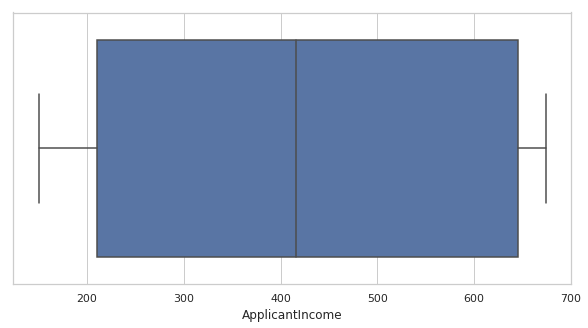

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.ApplicantIncome[train.ApplicantIncome<1000])

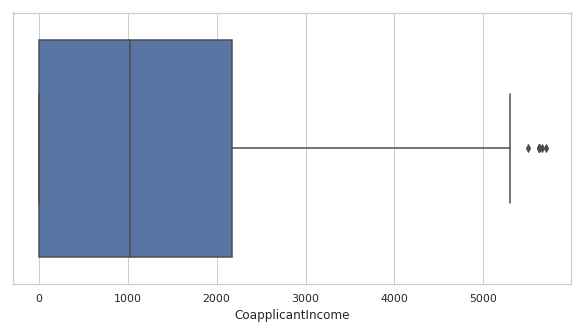

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.CoapplicantIncome[train.CoapplicantIncome<5743.125])

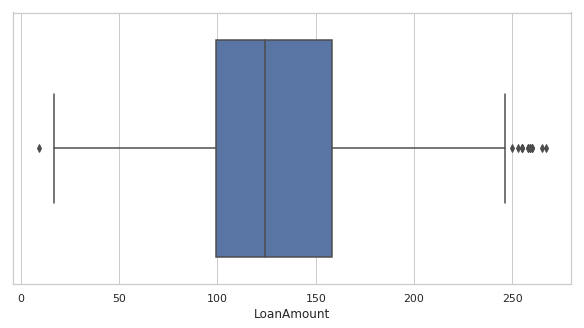

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.LoanAmount[train.LoanAmount<270])

In [53]:
df=train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [54]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [55]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [56]:
low = .0035
high = .993
quant_df = df.quantile([low, high])
print(quant_df)

        ApplicantIncome  CoapplicantIncome  LoanAmount
0.0035         449.3195              0.000       25.00
0.9930       38731.4520          11203.388      560.41


In [57]:
df = df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [58]:
df.dropna(inplace=True)
print(df.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount
1           4583.0             1508.0       128.0
3           2583.0             2358.0       120.0
5           5417.0             4196.0       267.0
6           2333.0             1516.0        95.0
7           3036.0             2504.0       158.0


In [59]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
1,4583.0,1508.0,128.0
3,2583.0,2358.0,120.0
5,5417.0,4196.0,267.0
6,2333.0,1516.0,95.0
7,3036.0,2504.0,158.0


In [60]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,321.000000,321.000000,321.000000
mean,3916.152648,2585.096324,145.177570
std,2390.166675,1566.600223,61.961351
min,645.000000,16.120001,26.000000
25%,2583.000000,1644.000000,110.000000
50%,3276.000000,2157.000000,131.000000
75%,4344.000000,3150.000000,170.000000
max,20833.000000,10968.000000,480.000000


                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000           0.217444    0.583989
CoapplicantIncome         0.217444           1.000000    0.516364
LoanAmount                0.583989           0.516364    1.000000


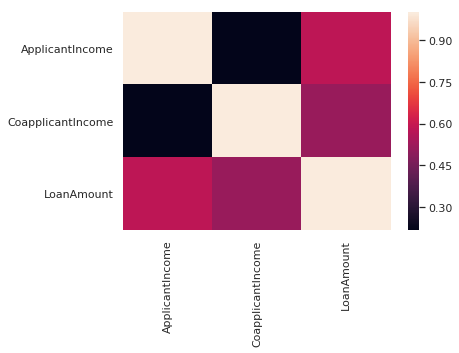

In [61]:
corr=df.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)


In [62]:
#Since half of the data is lost ,we can"t remove outliers

In [63]:
print(pd.isnull(train).sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [64]:
train.dropna(inplace=True)

In [65]:
print(pd.isnull(train).sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [67]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


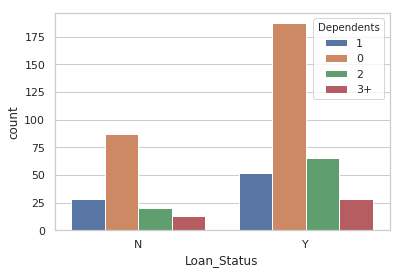

In [68]:
ax = sns.countplot(x="Loan_Status", hue="Dependents" ,data=train)

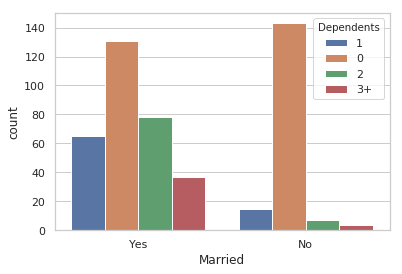

In [69]:
ax = sns.countplot(x="Married", hue="Dependents" ,data=train)

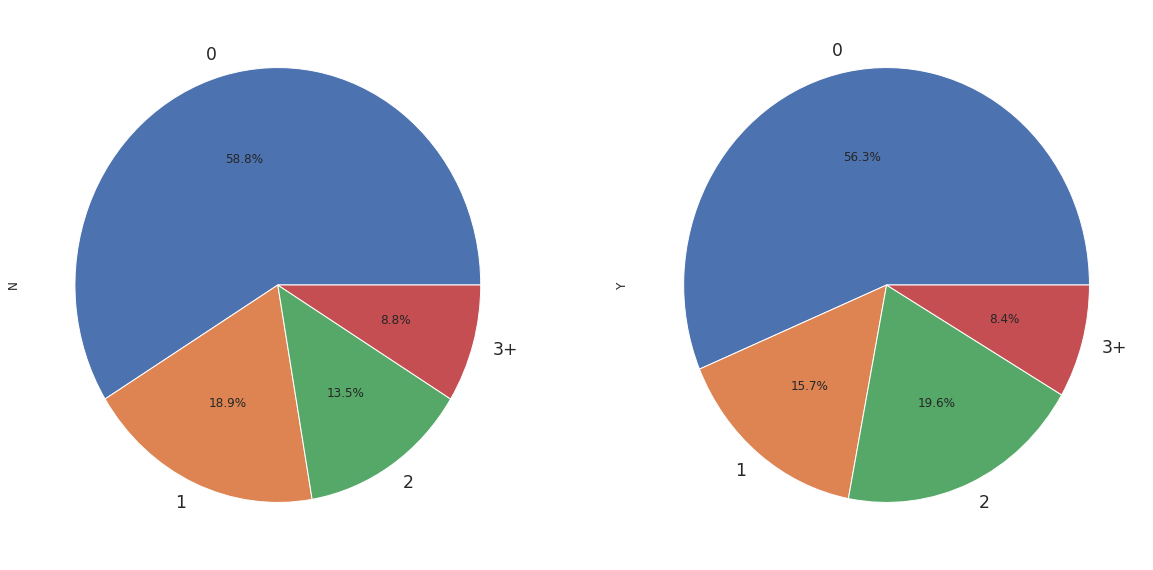

In [70]:
df = train.groupby(['Dependents','Loan_Status'])['Loan_Status'].count().unstack(level=0)
f,a = plt.subplots(1,2, figsize=(20,10))

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#plt.rcParams['font.size'] = 20.0
df.xs('N').plot(kind="pie",autopct='%1.1f%%', ax=a[0])
df.xs('Y').plot(kind='pie',autopct='%1.1f%%', ax=a[1])


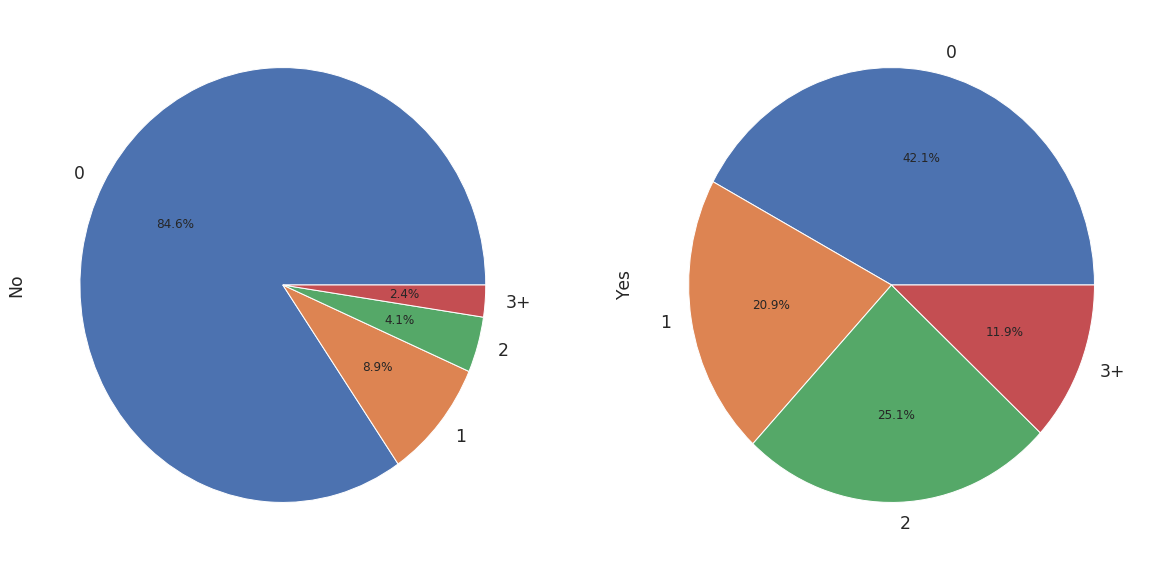

In [71]:
df = train.groupby(['Dependents','Married'])['Married'].count().unstack(level=0)
f,a = plt.subplots(1,2, figsize=(20,10))

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

#plt.rcParams['font.size'] = 20.0
df.xs('No').plot(kind="pie",autopct='%1.1f%%', ax=a[0])
df.xs('Yes').plot(kind='pie',autopct='%1.1f%%', ax=a[1])


In [72]:
print(train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate          

In [73]:
print(df)

Dependents    0   1   2  3+
Married                    
No          143  15   7   4
Yes         131  65  78  37


In [74]:
train.to_csv('./dataset/modified.csv',index=False)